**Developed by:** [Georgii Bocharov](https://github.com/georgebv)

**E-Mail:** bocharovgeorgii@gmail.com

**pyextremes:** https://github.com/georgebv/pyextremes

# Introduction
This notebook demonstrates multiple common methods used to assist when selecting optimal threshold value for the peak-over-threshold extreme value extraction method.

# Set up the environment
First, we need to setup the environment. Let's import the `pyextremes` library:

In [1]:
import pyextremes
print("pyextremes", pyextremes.__version__)

pyextremes 2.0.1


Now, let's import other packages required for this notebook:

In [2]:
import numpy as np
import pandas as pd

# Load the data
Data used in this tutorial was obtained from the New York City [the Battery](https://tidesandcurrents.noaa.gov/stationhome.html?id=8518750) tidal station. Data for this station was extracted using the [coastlib](https://github.com/georgebv/coastlib) library which provides an interface to the [NOAA CO-OPS API](https://tidesandcurrents.noaa.gov/api/). Let's load it and pre-process (discussed in more detail in [this tutorial](https://nbviewer.jupyter.org/github/georgebv/pyextremes-notebooks/blob/master/notebooks/EVA%20basic.ipynb)).

In [3]:
data = (
    pd
    .read_csv("../../data/battery_wl.csv", index_col=0, parse_dates=True, squeeze=True)
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
    .loc[pd.to_datetime("1925"):]
)
data = data - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3
data.head()

Date-Time (GMT)
1926-11-20 05:00:00   -0.411120
1926-11-20 06:00:00   -0.777120
1926-11-20 07:00:00   -1.051120
1926-11-20 08:00:00   -1.051121
1926-11-20 09:00:00   -0.808121
Name: Water Elevation [m NAVD88], dtype: float64

# Mean residual life plot
The mean residual life plot should be approximately linear above a threshold for which the Generalized Pareto Distribution model is valid. The strategy is to select the smallest (largest for `extremes_type="low"`) threshold value immediately above (below for `extremes_type="low"`) which the plot is approximately linear.

In [4]:
help(pyextremes.plot_mean_residual_life)

Help on function plot_mean_residual_life in module pyextremes.tuning.threshold_selection:

plot_mean_residual_life(ts: pandas.core.series.Series, thresholds=None, extremes_type: str = 'high', alpha: float = 0.95, figsize: tuple = (8, 5)) -> tuple
    Plot mean residual life for given threshold values.
    
    The mean residual life plot should be approximately linear above a threshold
    for which the Generalized Pareto Distribution model is valid.
    The strategy is to select the smallest (largest for extremes_type='low')
    threshold value immediately above (below for extremes_type='low')
    which the plot is approximately linear.
    
    Parameters
    ----------
    ts : pandas.Series
        Time series of the signal.
    thresholds : array-like, optional
        An array of thresholds for which the mean residual life plot is plotted.
        If None (default), plots mean residual life for 100 equally-spaced thresholds
        between 90th (10th if extremes_type='low') perce

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>)

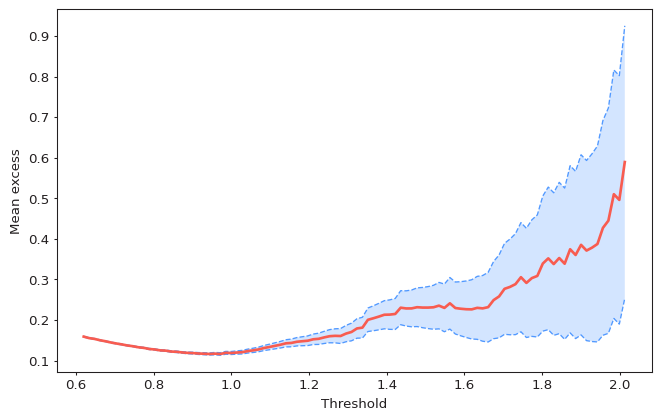

In [5]:
pyextremes.plot_mean_residual_life(ts=data)

Mean residual life plots are notoriously hard to interpret. Threshold selection should never be based soleley on this plot and considerable amount of experience is required to develop intuition required to read such plots. The plot above indicates that the region of thresholds where the linearity condition is approximately met appears to lie in the 1.2 to 1.6 range.

# Parameter stability plot
The parameter stability plot shows shape and modified scale parameters of the Generalized Pareto Distribution (GPD). Both shape and modified scale parameters should be approximately constant above a threshold for which the GPD model is valid. The strategy is to select the smallest (largest for `extremes_type="low"`) threshold value immediately above (below for `extremes_type="low"`) which the GPD parameters are approximately constant.

In [6]:
help(pyextremes.plot_parameter_stability)

Help on function plot_parameter_stability in module pyextremes.tuning.threshold_selection:

plot_parameter_stability(ts: pandas.core.series.Series, thresholds=None, r: Union[str, pandas._libs.tslibs.timedeltas.Timedelta] = '24H', extremes_type: str = 'high', alpha: Union[float, NoneType] = None, n_samples: int = 100, figsize: tuple = (8, 5)) -> tuple
    Plot parameter stability plot for given threshold values.
    
    The parameter stability plot shows shape and modified scale parameters
    of the Generalized Pareto Distribution (GPD).
    Both shape and modified scale parameters should be approximately constant above
    a threshold for which the GPD model is valid.
    The strategy is to select the smallest (largest for extremes_type='low')
    threshold value immediately above (below for extremes_type='low')
    which the GPD parameters are approximately constant.
    
    Parameters
    ----------
    ts : pandas.Series
        Time series of the signal.
    thresholds : array-l

(<Figure size 768x480 with 2 Axes>,
 (<AxesSubplot:ylabel='Shape, $\\xi$'>,
  <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>))

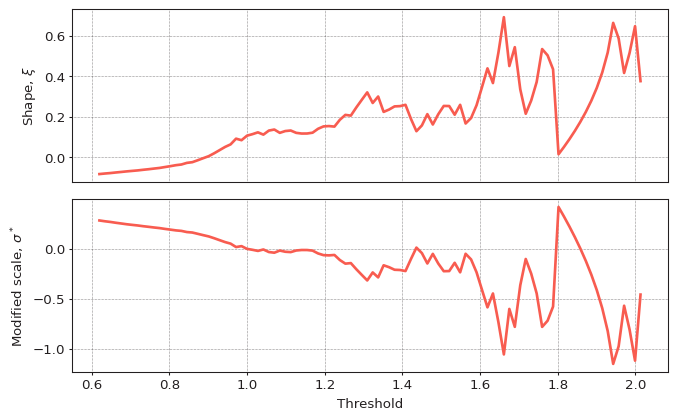

In [7]:
pyextremes.plot_parameter_stability(ts=data)

The parameter stability plot shown above indicates the distribution gets unstable after threshold value of 1.6, which indicates that threshold higher than 1.6 do not provide sufficient number of exceedances. The region of stability appears to be confined in the 1.2 to 1.6 range of threshold values.

# Return value stability plot
The return value stability plot shows return values for given return period for given thresholds. The purpose of this plot is to investigate statibility and sensitivity of the Generalized Pareto Distribution model to threshold value. Threshold value selection should still be guided by the mean residual life plot and the parameter stability plot. This plot should be used as additional check.

See https://docs.scipy.org/doc/scipy/reference/stats.html for a full list of supported distributions.

In [8]:
help(pyextremes.plot_return_value_stability)

Help on function plot_return_value_stability in module pyextremes.tuning.threshold_selection:

plot_return_value_stability(ts: pandas.core.series.Series, return_period, return_period_size: Union[str, pandas._libs.tslibs.timedeltas.Timedelta] = '1Y', thresholds=None, r: Union[str, pandas._libs.tslibs.timedeltas.Timedelta] = '24H', extremes_type: str = 'high', distributions: List[Union[str, scipy.stats._distn_infrastructure.rv_continuous]] = ['genpareto', 'expon'], alpha: Union[float, NoneType] = None, n_samples: int = 100, figsize: tuple = (8, 5)) -> tuple
    Plot return value stability plot for given threshold values.
    
    The return value stability plot shows return values for given return period
    for given thresholds.
    The purpose of this plot is to investigate statibility and sensitivity of the
    Generalized Pareto Distribution model to threshold value.
    Threshold value selection should still be guided by the mean residual life plot
    and the parameter stability pl

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Threshold', ylabel='Return value'>)

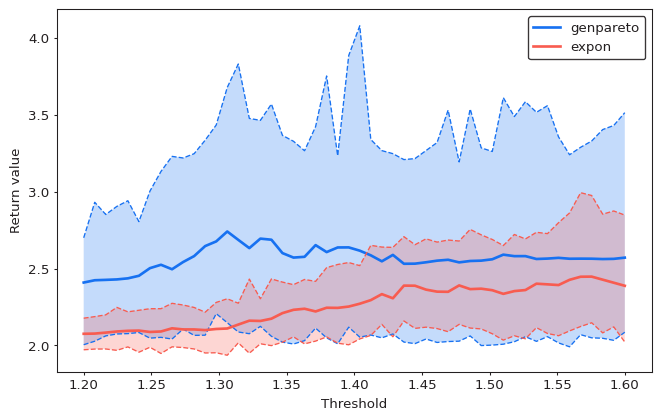

In [9]:
pyextremes.plot_return_value_stability(
    ts=data,
    return_period=100,
    return_period_size="365.2425D",
    thresholds=np.linspace(1.2, 1.6, 50),
    r="24H",
    extremes_type="high",
    distributions=["genpareto", "expon"],
    alpha=0.95,  # Set to None to get faster results
    n_samples=100,
)

The plot above indicates that extreme values above the threshold value of 1.45 appear to be constant for both distributions.

**CAUTION:** while it may be tempting to select a threshold value which gives return value desired for a particular analysis outcome, it is not a sound analysis procedure and some may call it (for a good reason) "cooking the books".